T20_CricketScore_prediction - ML Model

Data_extraction yaml to pandas

In [3]:
import numpy as np
import pandas as pd
from yaml import safe_load
import os
from tqdm import tqdm

In [4]:
filenames = []
for file in os.listdir('t20s'):
    filenames.append(os.path.join('t20s', file))

In [5]:
filenames[0:5]

['t20s\\1001349.yaml',
 't20s\\1001351.yaml',
 't20s\\1001353.yaml',
 't20s\\1004729.yaml',
 't20s\\1007655.yaml']

In [6]:
final_df = pd.DataFrame()
counter = 1
for file in tqdm(filenames):
    with open(file, 'r') as f:
        df = pd.json_normalize(safe_load(f))
        df['match_id'] = counter
        final_df = final_df.append(df)
        counter+=1

final_df

  0%|          | 0/1433 [00:00<?, ?it/s]

C:\Users\MOHIT RANJAN\AppData\Local\Temp\ipykernel_1688\1828250430.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df)
  0%|          | 1/1433 [00:01<24:54,  1.04s/it]C:\Users\MOHIT RANJAN\AppData\Local\Temp\ipykernel_1688\1828250430.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df)
  0%|          | 2/1433 [00:02<26:51,  1.13s/it]C:\Users\MOHIT RANJAN\AppData\Local\Temp\ipykernel_1688\1828250430.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df)
  0%|          | 3/1433 [00:03<24:50,  1.04s/it]C:\Users\MOHIT RANJAN\AppData\Local\Temp\ipykernel_1688\1828250430.py:7: FutureWarning: The frame.append method is deprecated and will be r

NotImplementedError: 

In [7]:
backup = final_df.copy()

Data_Processing

In [8]:
final_df

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,[2017-02-17],male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,[2017-02-19],male,T20,2.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,[2017-02-22],male,T20,NaN,Australia,20,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,[2016-09-05],male,T20,NaN,Hong Kong,20,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,[2016-06-18],male,T20,NaN,Zimbabwe,20,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",0.9,2016-03-05,2,[2016-03-04],male,T20,6.0,Pakistan,20,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",0.9,2016-03-08,1,[2016-03-06],male,T20,8.0,India,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Netherlands', 'deli...",0.9,2016-02-03,1,[2016-02-03],male,T20,NaN,Netherlands,20,...,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2016-09-12,1,[2016-09-06],male,T20,NaN,Australia,20,...,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
final_df.drop(columns=[
    'meta.data_version',
    'meta.created',
    'meta.revision',
    'info.outcome.bowl_out',
    'info.bowl_out',
    'info.supersubs.South Africa',
    'info.supersubs.New Zealand',
    'info.outcome.eliminator',
    'info.outcome.result',
    'info.outcome.method',
    'info.neutral_venue',
    'info.match_type_number',
    'info.outcome.by.runs',
    'info.outcome.by.wickets'
],inplace=True)


In [10]:
final_df

,innings,info.dates,info.gender,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.city
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-17],male,T20,Sri Lanka,20,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Melbourne Cricket Ground,1,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-19],male,T20,Sri Lanka,20,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[SD Fry, SJ Nogajski]","Simonds Stadium, South Geelong",2,Victoria
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-22],male,T20,Australia,20,[A Zampa],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Adelaide Oval,3,NaN
0,"[{'1st innings': {'team': 'Hong Kong', 'delive...",[2016-09-05],male,T20,Hong Kong,20,NaN,"[Ireland, Hong Kong]",bat,Hong Kong,"[R Black, AJ Neill]","Bready Cricket Club, Magheramason",4,Londonderry
0,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",[2016-06-18],male,T20,Zimbabwe,20,[E Chigumbura],"[Zimbabwe, India]",field,India,"[TJ Matibiri, RB Tiffin]",Harare Sports Club,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",[2016-03-04],male,T20,Pakistan,20,[Umar Akmal],"[Pakistan, Sri Lanka]",field,Pakistan,"[AK Chaudhary, Enamul Haque]",Shere Bangla National Stadium,1428,Mirpur
0,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",[2016-03-06],male,T20,India,20,[S Dhawan],"[Bangladesh, India]",field,India,"[RSA Palliyaguruge, Shozab Raza]",Shere Bangla National Stadium,1429,Mirpur
0,"[{'1st innings': {'team': 'Netherlands', 'deli...",[2016-02-03],male,T20,Netherlands,20,[Mudassar Bukhari],"[United Arab Emirates, Netherlands]",field,United Arab Emirates,"[CK Nandan, Sarika Prasad]",ICC Academy,1430,Dubai
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2016-09-06],male,T20,Australia,20,[GJ Maxwell],"[Sri Lanka, Australia]",field,Sri Lanka,"[REJ Martinesz, RR Wimalasiri]",Pallekele International Cricket Stadium,1431,NaN


In [16]:
final_df['info.gender'].value_counts()

male      966
female    466
Name: info.gender, dtype: int64

In [17]:
final_df = final_df[final_df['info.gender'] == 'male']
final_df.drop(columns=['info.gender'],inplace=True)
final_df

C:\Users\MOHIT RANJAN\AppData\Local\Temp\ipykernel_1688\2142223783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['info.gender'],inplace=True)


,innings,info.dates,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.city
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-17],T20,Sri Lanka,20,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Melbourne Cricket Ground,1,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-19],T20,Sri Lanka,20,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[SD Fry, SJ Nogajski]","Simonds Stadium, South Geelong",2,Victoria
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-22],T20,Australia,20,[A Zampa],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Adelaide Oval,3,NaN
0,"[{'1st innings': {'team': 'Hong Kong', 'delive...",[2016-09-05],T20,Hong Kong,20,NaN,"[Ireland, Hong Kong]",bat,Hong Kong,"[R Black, AJ Neill]","Bready Cricket Club, Magheramason",4,Londonderry
0,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",[2016-06-18],T20,Zimbabwe,20,[E Chigumbura],"[Zimbabwe, India]",field,India,"[TJ Matibiri, RB Tiffin]",Harare Sports Club,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",[2016-03-04],T20,Pakistan,20,[Umar Akmal],"[Pakistan, Sri Lanka]",field,Pakistan,"[AK Chaudhary, Enamul Haque]",Shere Bangla National Stadium,1428,Mirpur
0,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",[2016-03-06],T20,India,20,[S Dhawan],"[Bangladesh, India]",field,India,"[RSA Palliyaguruge, Shozab Raza]",Shere Bangla National Stadium,1429,Mirpur
0,"[{'1st innings': {'team': 'Netherlands', 'deli...",[2016-02-03],T20,Netherlands,20,[Mudassar Bukhari],"[United Arab Emirates, Netherlands]",field,United Arab Emirates,"[CK Nandan, Sarika Prasad]",ICC Academy,1430,Dubai
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2016-09-06],T20,Australia,20,[GJ Maxwell],"[Sri Lanka, Australia]",field,Sri Lanka,"[REJ Martinesz, RR Wimalasiri]",Pallekele International Cricket Stadium,1431,NaN


In [18]:
final_df['info.match_type'].value_counts()

T20    966
Name: info.match_type, dtype: int64

In [19]:
final_df['info.overs'].value_counts()

20    963
50      3
Name: info.overs, dtype: int64

In [20]:
final_df = final_df[final_df['info.overs'] == 20]
final_df.drop(columns=['info.overs','info.match_type'],inplace=True)
final_df

C:\Users\MOHIT RANJAN\AppData\Local\Temp\ipykernel_1688\3157072726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['info.overs','info.match_type'],inplace=True)


,innings,info.dates,info.outcome.winner,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.city
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-17],Sri Lanka,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Melbourne Cricket Ground,1,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-19],Sri Lanka,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[SD Fry, SJ Nogajski]","Simonds Stadium, South Geelong",2,Victoria
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-22],Australia,[A Zampa],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Adelaide Oval,3,NaN
0,"[{'1st innings': {'team': 'Hong Kong', 'delive...",[2016-09-05],Hong Kong,NaN,"[Ireland, Hong Kong]",bat,Hong Kong,"[R Black, AJ Neill]","Bready Cricket Club, Magheramason",4,Londonderry
0,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",[2016-06-18],Zimbabwe,[E Chigumbura],"[Zimbabwe, India]",field,India,"[TJ Matibiri, RB Tiffin]",Harare Sports Club,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",[2016-03-04],Pakistan,[Umar Akmal],"[Pakistan, Sri Lanka]",field,Pakistan,"[AK Chaudhary, Enamul Haque]",Shere Bangla National Stadium,1428,Mirpur
0,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",[2016-03-06],India,[S Dhawan],"[Bangladesh, India]",field,India,"[RSA Palliyaguruge, Shozab Raza]",Shere Bangla National Stadium,1429,Mirpur
0,"[{'1st innings': {'team': 'Netherlands', 'deli...",[2016-02-03],Netherlands,[Mudassar Bukhari],"[United Arab Emirates, Netherlands]",field,United Arab Emirates,"[CK Nandan, Sarika Prasad]",ICC Academy,1430,Dubai
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2016-09-06],Australia,[GJ Maxwell],"[Sri Lanka, Australia]",field,Sri Lanka,"[REJ Martinesz, RR Wimalasiri]",Pallekele International Cricket Stadium,1431,NaN


In [21]:
import pickle
pickle.dump(final_df,open('dataset_level1.pkl','wb'))

In [23]:
matches = pickle.load(open('dataset_level1.pkl','rb'))
matches.iloc[0]['innings'][0]['1st innings']['deliveries']

[{0.1: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.2: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.3: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
 {0.4: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 2, 'extras': 0, 'total': 2}}},
 {0.5: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.6: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 3, 'extras': 0, 'total': 3}}},
 {1.1: {'batsman': 'M Klinger',
   'bowler': 'KMDN Kulasekara',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 0, 'extras': 0, 'total': 

In [24]:
count = 1
delivery_df = pd.DataFrame()
for index, row in matches.iterrows():
    if count in [75,108,150,180,268,360,443,458,584,748,982,1052,1111,1226,1345]:
        count+=1
        continue
    count+=1
    ball_of_match = []
    batsman = []
    bowler = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    match_id = []
    city = []
    venue = []
    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            ball_of_match.append(key)
            batsman.append(ball[key]['batsman'])
            bowler.append(ball[key]['bowler'])
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')
    loop_df = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'batting_team':batting_team,
            'ball':ball_of_match,
            'batsman':batsman,
            'bowler':bowler,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'city':city,
            'venue':venue
        })
    delivery_df = delivery_df.append(loop_df)

C:\Users\MOHIT RANJAN\AppData\Local\Temp\ipykernel_1688\3780558368.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
C:\Users\MOHIT RANJAN\AppData\Local\Temp\ipykernel_1688\3780558368.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
C:\Users\MOHIT RANJAN\AppData\Local\Temp\ipykernel_1688\3780558368.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
C:\Users\MOHIT RANJAN\AppData\Local\Temp\ipykernel_1688\3780558368.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_

In [25]:
delivery_df

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue
0,2,"[Australia, Sri Lanka]",Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground
1,2,"[Australia, Sri Lanka]",Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground
2,2,"[Australia, Sri Lanka]",Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Melbourne Cricket Ground
3,2,"[Australia, Sri Lanka]",Australia,0.4,M Klinger,SL Malinga,2,0,NaN,Melbourne Cricket Ground
4,2,"[Australia, Sri Lanka]",Australia,0.5,M Klinger,SL Malinga,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...,...,...
121,964,"[Sri Lanka, Australia]",Sri Lanka,19.3,SMSM Senanayake,MA Starc,1,0,Colombo,R Premadasa Stadium
122,964,"[Sri Lanka, Australia]",Sri Lanka,19.4,DM de Silva,MA Starc,0,0,Colombo,R Premadasa Stadium
123,964,"[Sri Lanka, Australia]",Sri Lanka,19.5,DM de Silva,MA Starc,0,DM de Silva,Colombo,R Premadasa Stadium
124,964,"[Sri Lanka, Australia]",Sri Lanka,19.6,SMSM Senanayake,MA Starc,2,0,Colombo,R Premadasa Stadium


In [26]:
def bowl(row):
    for team in row['teams']:
        if team!= row['batting_team']:
            return team

In [27]:
delivery_df['bowling_team'] = delivery_df.apply(bowl,axis=1)

In [28]:
delivery_df

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,2,"[Australia, Sri Lanka]",Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
1,2,"[Australia, Sri Lanka]",Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
2,2,"[Australia, Sri Lanka]",Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Melbourne Cricket Ground,Sri Lanka
3,2,"[Australia, Sri Lanka]",Australia,0.4,M Klinger,SL Malinga,2,0,NaN,Melbourne Cricket Ground,Sri Lanka
4,2,"[Australia, Sri Lanka]",Australia,0.5,M Klinger,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...,...
121,964,"[Sri Lanka, Australia]",Sri Lanka,19.3,SMSM Senanayake,MA Starc,1,0,Colombo,R Premadasa Stadium,Australia
122,964,"[Sri Lanka, Australia]",Sri Lanka,19.4,DM de Silva,MA Starc,0,0,Colombo,R Premadasa Stadium,Australia
123,964,"[Sri Lanka, Australia]",Sri Lanka,19.5,DM de Silva,MA Starc,0,DM de Silva,Colombo,R Premadasa Stadium,Australia
124,964,"[Sri Lanka, Australia]",Sri Lanka,19.6,SMSM Senanayake,MA Starc,2,0,Colombo,R Premadasa Stadium,Australia


In [29]:
delivery_df.drop(columns=['teams'], inplace=True)

In [30]:
delivery_df

,match_id,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,2,Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
1,2,Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
2,2,Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Melbourne Cricket Ground,Sri Lanka
3,2,Australia,0.4,M Klinger,SL Malinga,2,0,NaN,Melbourne Cricket Ground,Sri Lanka
4,2,Australia,0.5,M Klinger,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,19.3,SMSM Senanayake,MA Starc,1,0,Colombo,R Premadasa Stadium,Australia
122,964,Sri Lanka,19.4,DM de Silva,MA Starc,0,0,Colombo,R Premadasa Stadium,Australia
123,964,Sri Lanka,19.5,DM de Silva,MA Starc,0,DM de Silva,Colombo,R Premadasa Stadium,Australia
124,964,Sri Lanka,19.6,SMSM Senanayake,MA Starc,2,0,Colombo,R Premadasa Stadium,Australia


In [31]:
delivery_df['batting_team'].unique()

array(['Australia', 'Hong Kong', 'Zimbabwe', 'India', 'Bangladesh',
       'New Zealand', 'South Africa', 'England', 'West Indies', 'Ireland',
       'Afghanistan', 'Pakistan', 'United Arab Emirates', 'Scotland',
       'Oman', 'Papua New Guinea', 'Sri Lanka', 'Netherlands', 'Nepal',
       'Vanuatu', 'Philippines', 'United States of America', 'Germany',
       'Ghana', 'Uganda', 'Kenya', 'Namibia', 'Nigeria', 'Botswana',
       'Guernsey', 'Denmark', 'Jersey', 'Italy', 'Norway', 'Thailand',
       'Malaysia', 'Maldives', 'Singapore', 'Kuwait', 'Bermuda', 'Canada',
       'Cayman Islands', 'Portugal', 'Gibraltar', 'Spain', 'Bhutan',
       'Qatar', 'Iran', 'Belgium', 'Isle of Man', 'Bulgaria', 'Romania'],
      dtype=object)

In [32]:
teams = [
    'Australia',
    'India',
    'Bangladesh',
    'New Zealand',
    'South Africa',
    'England',
    'West Indies',
    'Afghanistan',
    'Pakistan',
    'Sri Lanka'   
]

In [33]:
delivery_df = delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df = delivery_df[delivery_df['bowling_team'].isin(teams)]

In [35]:
delivery_df

,match_id,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,2,Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
1,2,Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
2,2,Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Melbourne Cricket Ground,Sri Lanka
3,2,Australia,0.4,M Klinger,SL Malinga,2,0,NaN,Melbourne Cricket Ground,Sri Lanka
4,2,Australia,0.5,M Klinger,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,19.3,SMSM Senanayake,MA Starc,1,0,Colombo,R Premadasa Stadium,Australia
122,964,Sri Lanka,19.4,DM de Silva,MA Starc,0,0,Colombo,R Premadasa Stadium,Australia
123,964,Sri Lanka,19.5,DM de Silva,MA Starc,0,DM de Silva,Colombo,R Premadasa Stadium,Australia
124,964,Sri Lanka,19.6,SMSM Senanayake,MA Starc,2,0,Colombo,R Premadasa Stadium,Australia


In [36]:
output = delivery_df[['match_id','batting_team','bowling_team','ball','runs','player_dismissed','city','venue']]

In [37]:
output

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [38]:
pickle.dump(output,open('dataset_level2.pkl','wb'))

Feature Extraction - Part 2

In [39]:
df = pickle.load(open('dataset_level2.pkl','rb'))
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [40]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

<AxesSubplot:>

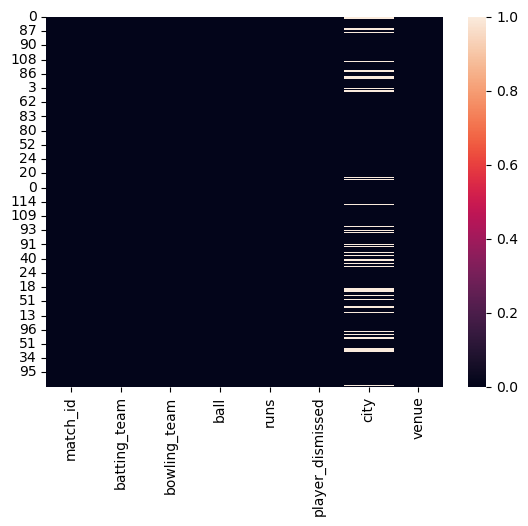

In [41]:
import seaborn as sns
sns.heatmap(df.isnull())

In [42]:
output = df[df['city'].isnull()]['venue'].value_counts()
output

Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

In [45]:
import matplotlib.pyplot as plt

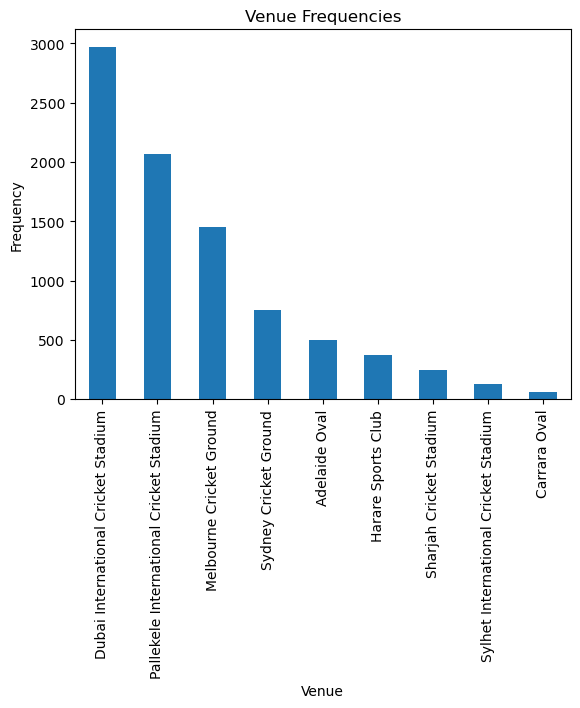

In [44]:
output.plot(kind='bar')

# Set the title and labels
plt.title('Venue Frequencies')
plt.xlabel('Venue')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [48]:
#Splitting the first word from the venue name and applying in the place of null city.


cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]), df['city'])

In [49]:
df['city'] = cities

In [51]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [52]:
df.drop(columns=['venue'], inplace=True)

In [53]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo
122,964,Sri Lanka,Australia,19.4,0,0,Colombo
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
124,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [54]:
df['current_score'] = df.groupby('match_id').cumsum()['runs_x']

KeyError: 'runs_x'